In [1]:
%matplotlib notebook

In [2]:
# Setup dependencies for charting and SQLAlchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# add a config file to the .gitignore to import username and password needed for the engine
from config import username_password

In [3]:
# Create an engine that can talk to the database
engine = create_engine(f'postgresql://{username_password}@localhost:5432/employees_db_sql_challenge')

connection = engine.connect()

In [4]:
# Set how floats should display for the charts
pd.options.display.float_format = "{:.2f}".format

In [5]:
# Examine the salary table
data_salaries = pd.read_sql('SELECT * FROM salaries', connection)
# Preview the data
data_salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
# Look at statistics for the salaries
data_salaries.describe()

,emp_no,salary
count,300024.00,300024.00
mean,253321.76,52970.73
std,161828.24,14301.48
min,10001.00,40000.00
25%,85006.75,40000.00
50%,249987.50,48681.00
75%,424993.25,61758.00
max,499999.00,129492.00


<IPython.core.display.Javascript object>


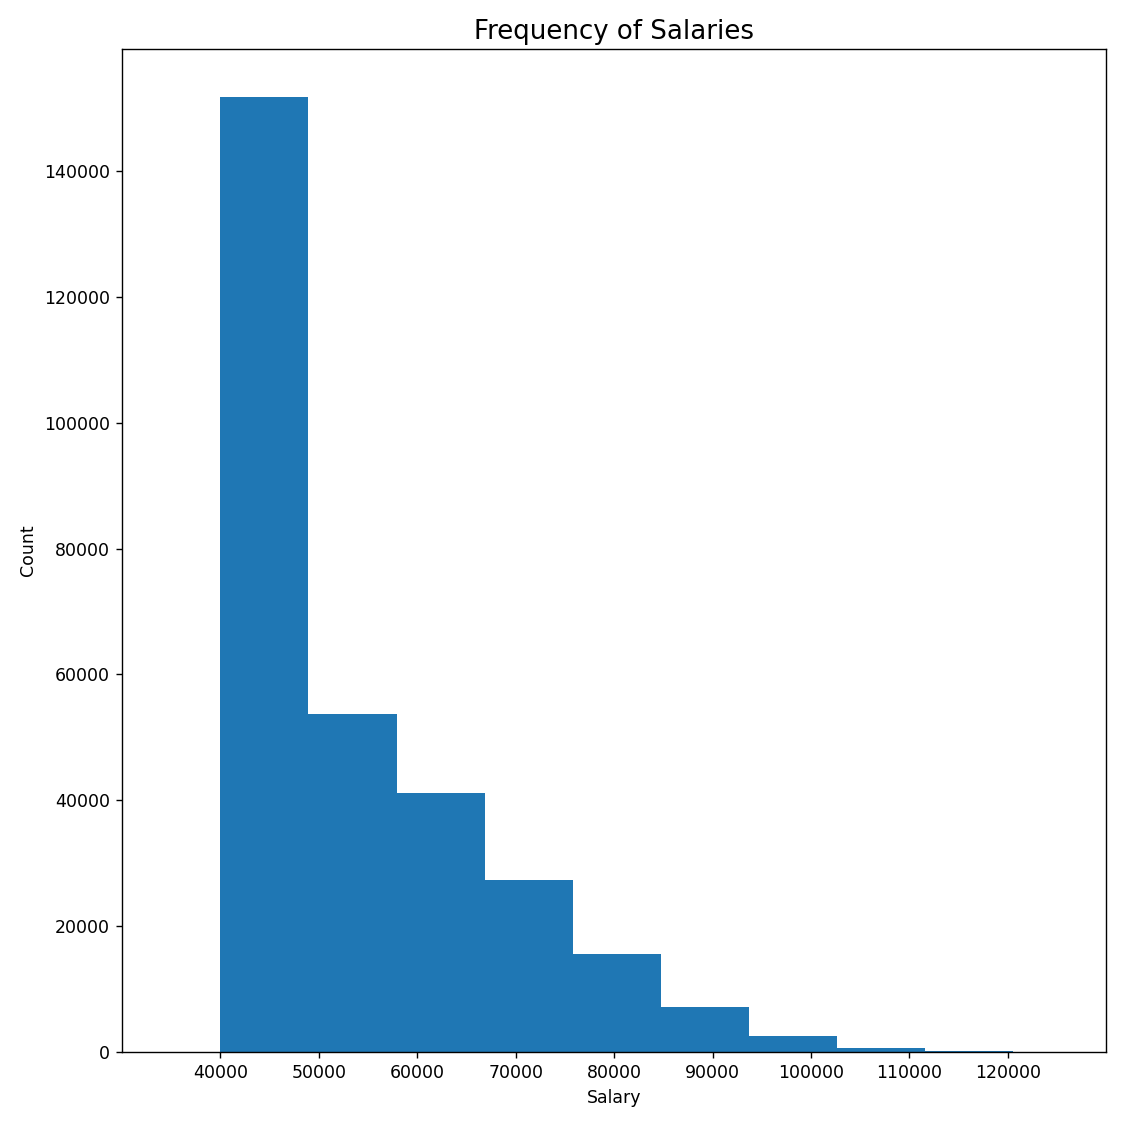

In [7]:
# Create a histogram of salaries
# Plot a histogram of the frequency of salary ranges
emp_salaries = data_salaries['salary']

# Consider tick marks needed across x-axis
x_axis = np.arange(40000, 130000, 10000)
tick_locations = [value for value in x_axis]

# Plot the figure and set the xlim
hist_fig = plt.figure(figsize=(9, 9))
hist_fig = plt.xlim([30000, 130000])
hist_fig = plt.hist(emp_salaries)

# Add title and labels and show the histogram
plt.title("Frequency of Salaries", size=15)
plt.xlabel("Salary")
plt.ylabel('Count')
plt.xticks(tick_locations, x_axis)
plt.show()
plt.tight_layout()

### Observation:
* The histogram for salaries shows salaries are commonly below \\$50,000 for these employees, and that the minimum salary is $40,000.

In [8]:
# To also look at salaries by title, read in the employees and titles tables 
data_employees = pd.read_sql('SELECT * FROM employees', connection)
data_employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [9]:
data_titles = pd.read_sql('SELECT * FROM titles', connection)
data_titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [ ]:
# Merge the three tables
